In [1]:
import pandas as pd
import numpy as np
from skimage.io import imshow # visualize satellite images
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [2]:
#Train'de çok fazla data olduğundan sadece test verileri alındı.
X_train_fpath = "../input/deepsat-sat4/X_test_sat4.csv"
y_train_fpath = "../input/deepsat-sat4/y_test_sat4.csv"
# X_test_fpath = "../input/deepsat-sat4/X_test_sat4.csv"
# y_test_fpath = "../input/deepsat-sat4/y_test_sat4.csv"

In [3]:
X_train = pd.read_csv(X_train_fpath)
y_train = pd.read_csv(y_train_fpath)

# # X_test = pd.read_csv(X_test_fpath)
# # y_test = pd.read_csv(y_test_fpath)

In [4]:
X_train.shape

(99999, 3136)

In [5]:
y_train.shape

(99999, 4)

In [6]:
y_train.iloc[0][1]

0

In [7]:
X_train = X_train.values.reshape([X_train.shape[0],28,28,4]).astype(float)
X_train = X_train / 255.0

# X_test = X_test.values.reshape([X_test.shape[0],28,28,4]).astype(float)
# X_test = X_test / 255.0


In [8]:
X_train.shape

(99999, 28, 28, 4)

Trees


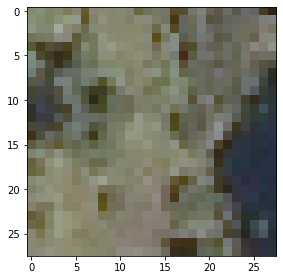

In [9]:
index = 11
imshow(np.squeeze(X_train[index,:,:,0:3]).astype(float))
plt.show

if y_train.iloc[index][0] == 1:
    print ('Barren Land')
elif y_train.iloc[index][1] == 1:
    print ('Trees')
elif y_train.iloc[index][2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [10]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state = 0)

In [11]:
cnn = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(28, 28, 4)),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(10, activation='relu'),
  BatchNormalization(),
  Dense(10, activation='relu'),
  BatchNormalization(),
  Dense(4,activation='softmax')  
])      

2022-06-19 17:04:48.113528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 17:04:48.212328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 17:04:48.213193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 17:04:48.214432: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
history = cnn.fit(X_train2,y_train2,batch_size=32,epochs=40,validation_data=(X_val,y_val))

2022-06-19 17:04:50.857089: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1003507456 exceeds 10% of free system memory.
2022-06-19 17:04:51.930153: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1003507456 exceeds 10% of free system memory.
2022-06-19 17:04:52.695086: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-06-19 17:04:54.349650: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2500/2500 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9142

2022-06-19 17:05:12.923972: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 250880000 exceeds 10% of free system memory.
2022-06-19 17:05:13.049909: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 250880000 exceeds 10% of free system memory.


2500/2500 [==============================] - 22s 6ms/step - loss: 0.2540 - accuracy: 0.9142 - val_loss: 0.4956 - val_accuracy: 0.7962
Epoch 2/40
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1512 - accuracy: 0.9488 - val_loss: 0.3081 - val_accuracy: 0.9217
Epoch 3/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1185 - accuracy: 0.9590 - val_loss: 0.5940 - val_accuracy: 0.8015
Epoch 4/40
2500/2500 [==============================] - 16s 6ms/step - loss: 0.1018 - accuracy: 0.9660 - val_loss: 0.1350 - val_accuracy: 0.9535
Epoch 5/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.0888 - accuracy: 0.9695 - val_loss: 0.8892 - val_accuracy: 0.7790
Epoch 6/40
2500/2500 [==============================] - 15s 6ms/step - loss: 0.0787 - accuracy: 0.9738 - val_loss: 0.2302 - val_accuracy: 0.9071
Epoch 7/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.0720 - accuracy: 0.9757 - val_loss: 0.2788 - val_accuracy: 0.9

In [14]:
cnn.save('./')

2022-06-19 17:14:35.455799: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


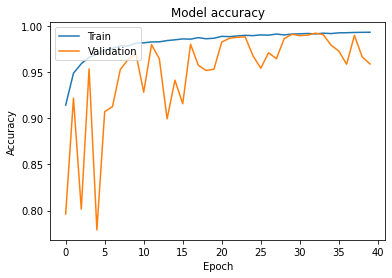

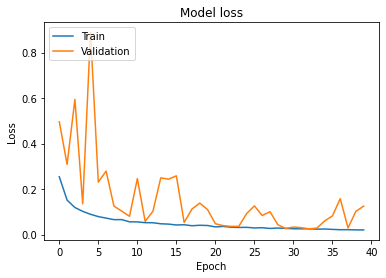

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# evaluate the model
_, train_acc = cnn.evaluate(X_train2,y_train2, verbose=0)
_, test_acc = cnn.evaluate(X_val,y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

2022-06-19 17:14:40.136801: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1003507456 exceeds 10% of free system memory.


Train: 0.962, Test: 0.959


In [17]:
predictions = cnn.predict(X_val)

In [18]:
y_val.shape

(20000, 4)

In [19]:
import tensorflow as tf
recall = tf.keras.metrics.Recall()
recall.update_state(y_val,predictions) #y_true,y_pred
rec=recall.result().numpy()
print(rec)
precision = tf.keras.metrics.Precision()
precision.update_state(y_val,predictions)
prec=precision.result().numpy()
print(prec)

0.9586
0.9589836


In [20]:
f1 = 2 * ((prec * rec) / ( prec + rec ))
print(f1)

0.9587917327880859
